# A simple example of downloading data from the Gaia archive and putting it in to the distance calculation programme

In [37]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
import astropy.io
from astroquery.gaia import Gaia

# Collect data

Download from Gaia archive - to avoid time-outs and because this is just an example, use random_index to take a subsample

In [48]:

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore') # Anything for a quiet life...

job = Gaia.launch_job_async("SELECT source_id,l,b,parallax,parallax_error,phot_g_mean_mag,phot_rp_mean_mag \
                            FROM gaiadr2.gaia_source WHERE radial_velocity IS NOT NULL AND parallax IS NOT NULL \
                            AND phot_g_mean_mag IS NOT NULL and phot_rp_mean_mag IS NOT NULL \
                            AND random_index<100000;")

#print (job)


Query finished.


# Write results in format that is readable by the distance finding code

I know, I know, plain ascii, no header, all round lazy formatting that can cause trouble. Easy though...

(Though the output is csv. Very confusing. Sorry.)

In [49]:
r = job.get_results()
astropy.io.ascii.write(r,'partial_input.tab', format='no_header',overwrite=True)

# Run distance code on the results

In [50]:
! ./Distance_calc_wGRVS.exe partial_input.tab partial_output.csv

# Test plot - distance vs distance_error

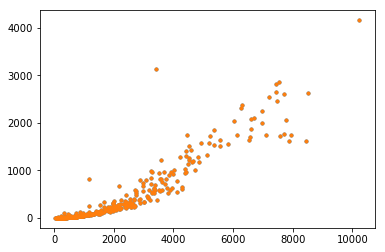

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

tab = pd.read_csv('partial_output.csv')

plt.plot(tab['distance'],tab['distance_error'],'.')
plt.show()